In [34]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from discrete1d_model import discrete1d_model
%matplotlib inline

In [35]:
# define the "true" SB distribution
nbins = 2000
b = 0.001 + 0.001*np.arange(nbins)
a = np.roll(b, 1)
rin = 0.1/140.
a[0] = rin
r = 0.5*(a+b)

flux = 0.12
sig = 0.5
SB = (r/sig)**-0.75 * np.exp(-0.5*(r/sig)**2.5)
int_SB = np.trapz(2.*np.pi*SB*r, r)
SB *= flux/int_SB

# load the "true" visibilities and convert to a binned 1-D profile
data = np.load('../testbed/testA.vis.npz')
rho_all = np.sqrt(data['u']**2 + data['v']**2)
vis_all = data['nf_Vis'].real
Ruv = np.linspace(np.amin(rho_all), np.amax(rho_all), num=1000)
Rwid = 0.5*(Ruv[1]-Ruv[0])
tvis = np.zeros_like(Ruv)
for ib in np.arange(len(Ruv)):
    inb = np.where((rho_all >= Ruv[ib]-Rwid) & (rho_all < Ruv[ib]+Rwid))
    if (len(inb[0]) >= 5): 
        tvis[ib] = np.average(vis_all[inb]) 
    else: tvis[ib] = -1e5

parser = np.where(tvis >= -1e4)
Ruv = Ruv[parser]
tvis = tvis[parser]

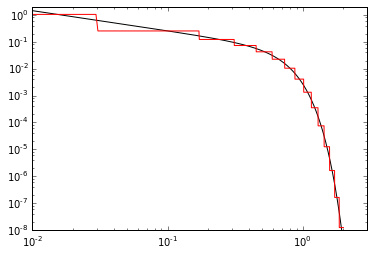

In [36]:
# define a "binned" version of that
nbbins = 15
bb = np.linspace(0.03, 2.0, num=nbbins)
ba = np.roll(bb, 1)
ba[0] = rin
br = 0.5*(ba+bb)
bSB = (br/sig)**-0.75 * np.exp(-0.5*(br/sig)**2.5)
bSB *= flux/int_SB
stepSB = np.zeros_like(r)
for i in np.arange(nbbins): stepSB[(r>ba[i])&(r<=bb[i])] = bSB[i]
bins = rin, bb
    
# plot these together
plt.axis([0.01, 3, 1e-8, 2])
plt.loglog(r, SB, 'k', r, stepSB, 'r')
plt.show()
plt.clf()

[   16775.86772833    27061.69381406    29633.15033549    32204.60685692
    37347.51989979    39918.97642122    42490.43294265    45061.88946409
    47633.34598552    52776.25902838    55347.71554982    57919.17207125
    60490.62859268    65633.54163555    68204.99815698    70776.45467841
    73347.91119984    75919.36772128    78490.82424271    81062.28076414
    83633.73728557    86205.19380701    88776.65032844    91348.10684987
    93919.5633713     96491.01989274    99062.47641417   101633.9329356
   104205.38945703   106776.84597847   109348.3024999    111919.75902133
   114491.21554276   117062.6720642    122205.58510706   124777.04162849
   127348.49814993   129919.95467136   132491.41119279   135062.86771422
   137634.32423566   140205.78075709   142777.23727852   145348.69379995
   147920.15032139   150491.60684282   153063.06336425   155634.51988568
   158205.97640712   160777.43292855   163348.88944998   165920.34597141
   168491.80249285   171063.25901428   173634.715535

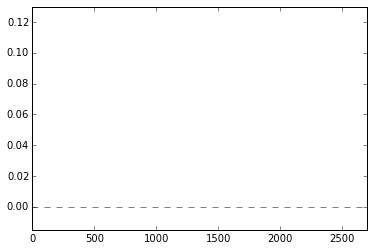

In [37]:
# compute the "binned" visibility profile
rhoin = Ruv
print(Ruv)
bvis = discrete1d_model(bSB, rhoin, bins)
print(Ruv)

# plot the "true" and "binned" visibility profiles
plt.axis([0, 2700, -0.015, 0.13])
plt.plot([0, 2700], [0, 0], '--k', alpha=0.5)
plt.plot(1e-3*Ruv, tvis, 'k')
#plt.plot(1e-3*Ruv, bvis, 'r')